<a href="https://colab.research.google.com/github/Ransaka/data-ai-inspire/blob/main/2%20Headlines%20clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install datasets --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.6 MB/s eta 0:00:00


# Load dataset

In [2]:
import datasets

In [3]:
dataset = datasets.load_dataset("rajistics/million-headlines")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:80: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

In [5]:
dataset = dataset['train'].shuffle().select(range(10_000))

In [7]:
headlines = dataset['headline_text']

In [40]:
headlines[:10]

['george most likely name says royal commentator',
 'off the line round 11 a league steve horvat',
 'amos this is why i rejoiced with the shambrooks',
 'share market limps to close as traders analyse myefo',
 'child porn case mp can seek judicial review',
 'transport workers angry at queensland rail',
 'dr francis mcnab has created controversy in the',
 'macdonald to overcome head injury',
 'closer pm1',
 'gunmen launch major attack on pakistani prison holding militants']

# TF-IDF Vectorization

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset['headline_text'])

# Dimensionality reduction

In [14]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

In [16]:
svd_data = TruncatedSVD(n_components=2).fit_transform(X)

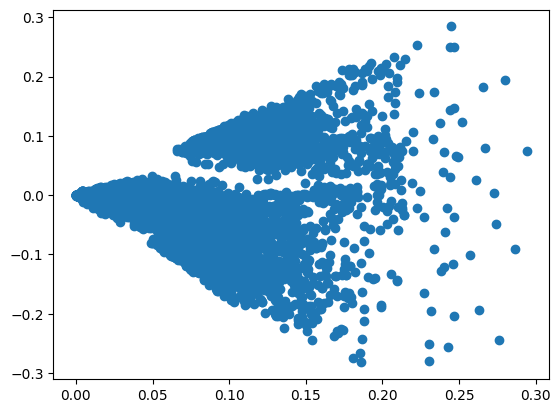

In [19]:
plt.scatter(svd_data[:,0], svd_data[:,1]);

# Perform clustering

In [20]:
from sklearn.cluster import KMeans

In [37]:
clusters = KMeans(n_clusters=3).fit_predict(X)

In [38]:
clusters.shape

(10000,)

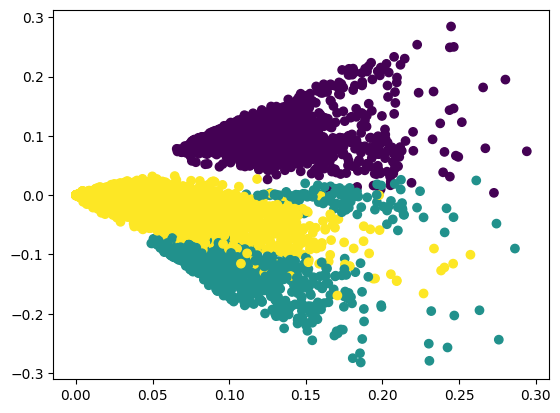

In [39]:
plt.scatter(svd_data[:,0], svd_data[:,1], c=clusters);